# Web Scraping With BeautifulSoup & Request
<h4>Used Indeed Link: https://www.indeed.com/jobs?q=data%20analyst&l=Minnesota&advn=4408088884958314&vjk=bf6c9992979e5030</h4>
    <h3>The Base URL: https://www.indeed.com/jobs</h3>
    <h3>The Query Parameters: ?q=data%20analyst&l=Minnesota&advn=4408088884958314&vjk=bf6c9992979e5030</h3>

# Installing Required Libraries

In [64]:
#!pip install requests
#!pip install beautifulsoup4
#!pip install lxml
#!pip install html5lib
#!pip install selenium
#!pip install time

  Could not find a version that satisfies the requirement time (from versions: )
No matching distribution found for time


# Scraping HTML Content From Desired Page

In [1]:
import requests 
from bs4 import BeautifulSoup

URL = 'https://www.indeed.com/jobs?q=data%20analyst&l=Minnesota&advn=4408088884958314&vjk=bf6c9992979e5030'
page = requests.get(URL).text

soup = BeautifulSoup(page, 'lxml')

# Inspecting the imported HTML Tags with pprint() & Prettify()

In [2]:
#import pprint
#pp = pprint.PrettyPrinter(indent=2)
#pp.pprint(page.content)
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta content="text/html;charset=utf-8" http-equiv="content-type"/>
  <script src="/s/ea358df/en_US.js" type="text/javascript">
  </script>
  <link href="/s/e1d8b3d/jobsearch_all.css" rel="stylesheet" type="text/css"/>
  <link href="http://rss.indeed.com/rss?q=data+analyst&amp;l=Minnesota" rel="alternate" title="Data Analyst Jobs, Employment in Minnesota" type="application/rss+xml"/>
  <link href="/m/jobs?q=data+analyst&amp;l=Minnesota" media="only screen and (max-width: 640px)" rel="alternate"/>
  <link href="/m/jobs?q=data+analyst&amp;l=Minnesota" media="handheld" rel="alternate"/>
  <script type="text/javascript">
   if (typeof window['closureReadyCallbacks'] == 'undefined') {
window['closureReadyCallbacks'] = [];
}

function call_when_jsall_loaded(cb) {
if (window['closureReady']) {
cb();
} else {
window['closureReadyCallbacks'].push(cb);
}
}
  </script>
  <meta content="1" name="ppstriptst"/>
  <script>
   var _scriptDownloadCou

# Get HTML using "Class"

In [3]:
res = soup.find(class_= 'summary')
res = res.text
print(res)



South Country Health Alliance (SCHA)*, a county-based health plan serving 9 counties in Minnesota, has the following opening:



# Get HTML using "Class" (With For Loop for all items)

In [4]:
for result in soup.find_all('div', class_ = 'title'):
    result = result.text
    print(result)



Data Analyst



Business Analyst I



Data Analyst - Anatomic Pathology



Healthcare Data Analyst - Minneapolis



Data Analyst



Data Analytics Analyst



Business Process Data Analyst



Junior Business Analyst



Data Analyst- Contractor



Data Science Analyst - Kern Center



SQL Developer Data Analyst



Data Analyst



Electronic Data Interchange Analyst



Marketing Data Analyst



Entry level Business Analyst/Software Eng



Sales & Forecasting Analyst



Sales Analyst



Data Analyst III



Business Analyst - Information Technology



# Get HTML using "ID" (With Selenium)

In [5]:
import requests 
from bs4 import BeautifulSoup
from selenium import webdriver
import time

driver = webdriver.Chrome(executable_path ='C:/Users/mjpk2/OneDrive/Desktop/Chrome Driver/chromedriver.exe')
URL = 'https://www.indeed.com/jobs?q=data%20analyst&l=Minnesota&advn=4408088884958314&vjk=bf6c9992979e5030'
driver.maximize_window()
driver.get(URL)
page = requests.get(URL).text

time.sleep(5)
content = driver.page_source.encode('utf-8').strip()
soup = BeautifulSoup(content,"html.parser")
for pos in soup.find_all(id= 'vjs-jobtitle'):
    res = pos.text
    print(res)
    print('')
    for descp in soup.find_all(id= 'vjs-desc'):
        descp = descp.text
        print(descp)


Business Data Analyst

This particular job post is no longer active. The job listing may still be published on Compeer Financial. You may also want to search Indeed's current listings for Compeer Financial to see if a newer version of this job post exists.Position Overview:
This position acts as a liaison between business units and the Enterprise Data team while coordinating and leading the delivery of data solutions projects of all sizes. Projects include new initiatives as well as the maintenance and improvement of existing data initiatives. The incumbent must be able to quickly grasp business concepts and facilitate discussions to identify high level business requirements and needs.
Essential Functions:
Analyzes business needs and consults with management and team members to review project requests and determine goals, time frame, cost, staffing requirements, allocation of resources and develops business cases.
Formulates and defines the scope and objectives of engagement.
Creates a

# Cleaning our obtained Corpus (With NLTK)

<h3>Import NLP Libraries</h3>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import re 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

In [8]:
# Initializing my Corpus 
corpus = ''
# Keeping Texts Only
description = re.sub('[^a-zA-Z]', ' ', descp)
# All Lowercase
description = description.lower()
# Creating List of words
description = description.split()
ps = PorterStemmer()
# Remove stopwords & Stemming (Keeping root words only)
description = [ps.stem(word) for word in description if not word in set(stopwords.words('english'))]
description = ' '.join(description)
corpus = corpus + description
print(corpus)

particular job post longer activ job list may still publish compeer financi may also want search inde current list compeer financi see newer version job post exist posit overview posit act liaison busi unit enterpris data team coordin lead deliveri data solut project size project includ new initi well mainten improv exist data initi incumb must abl quickli grasp busi concept facilit discuss identifi high level busi requir need essenti function analyz busi need consult manag team member review project request determin goal time frame cost staf requir alloc resourc develop busi case formul defin scope object engag creat execut test plan test case facilit user accept test prepar statu report commun statu relat issu engag stakehold lead manag project team accomplish data effort facilit meet provid guidanc set prioriti organ work give direct resolv problem work team member across organ identifi process improv opportun conduct duti busi data analyst collabor process consult team pursu data e

# Creating a WordCloud

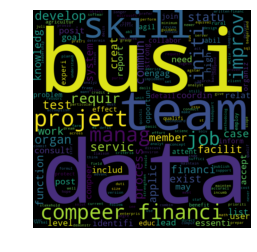

In [9]:
wordcloud = WordCloud(width=680, height=680, margin=0).generate(corpus)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Creating the list of words

In [27]:
#The word_tokenize() function will break our text phrases into #individual words
from nltk.tokenize import word_tokenize
tokens = word_tokenize(corpus)
#we'll create a new list which contains punctuation we wish to clean
punctuations = ['(',')',';',':','[',']',',']
#We initialize the stopwords variable which is a list of words like #"The", "I", "and", etc. that don't hold much value as keywords
stop_words = stopwords.words('english')
#We create a list comprehension which only returns a list of words #that are NOT IN stop_words and NOT IN punctuations.
keywords = [word for word in tokens if not word in stop_words and not word in punctuations]
print(keywords)

['posit', 'overview', 'posit', 'act', 'liaison', 'busi', 'unit', 'enterpris', 'data', 'team', 'coordin', 'lead', 'deliveri', 'data', 'solut', 'project', 'size', 'project', 'includ', 'new', 'initi', 'well', 'mainten', 'improv', 'exist', 'data', 'initi', 'incumb', 'must', 'abl', 'quickli', 'grasp', 'busi', 'concept', 'facilit', 'discuss', 'identifi', 'high', 'level', 'busi', 'requir', 'need', 'essenti', 'function', 'analyz', 'busi', 'need', 'consult', 'manag', 'team', 'member', 'review', 'project', 'request', 'determin', 'goal', 'time', 'frame', 'cost', 'staf', 'requir', 'alloc', 'resourc', 'develop', 'busi', 'case', 'formul', 'defin', 'scope', 'object', 'engag', 'creat', 'execut', 'test', 'plan', 'test', 'case', 'facilit', 'user', 'accept', 'test', 'prepar', 'statu', 'report', 'commun', 'statu', 'relat', 'issu', 'engag', 'stakehold', 'lead', 'manag', 'project', 'team', 'accomplish', 'data', 'effort', 'facilit', 'meet', 'provid', 'guidanc', 'set', 'prioriti', 'organ', 'work', 'give', 'di